# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1) Which variables are significant in predicting the demand for shared bikes?
2) How well those variables describe the bike demands?

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors

##### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

## Step 1 : Reading, Understanding & Visualzing the data

In [20]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Activating necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [22]:
# Read the data from source csv file

bike_df = pd.read_csv('day.csv')

In [23]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [25]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [26]:
# checking for the null values
# Inference : No null values

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
# checking for duplicates 
# Inference : No duplicates

bike_df.drop_duplicates(subset=None, inplace=True)

In [28]:
bike_df.shape

(730, 16)

In [29]:
# dropping unwanted & redundant columns 
# instant column has only row numbers & not needed 
# dteday column has date info, but there is also year and month columns and so dteday column not needed
# casual and registered columns reflect categories of users from historical data, but not necessary for predicting the demand

bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [30]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


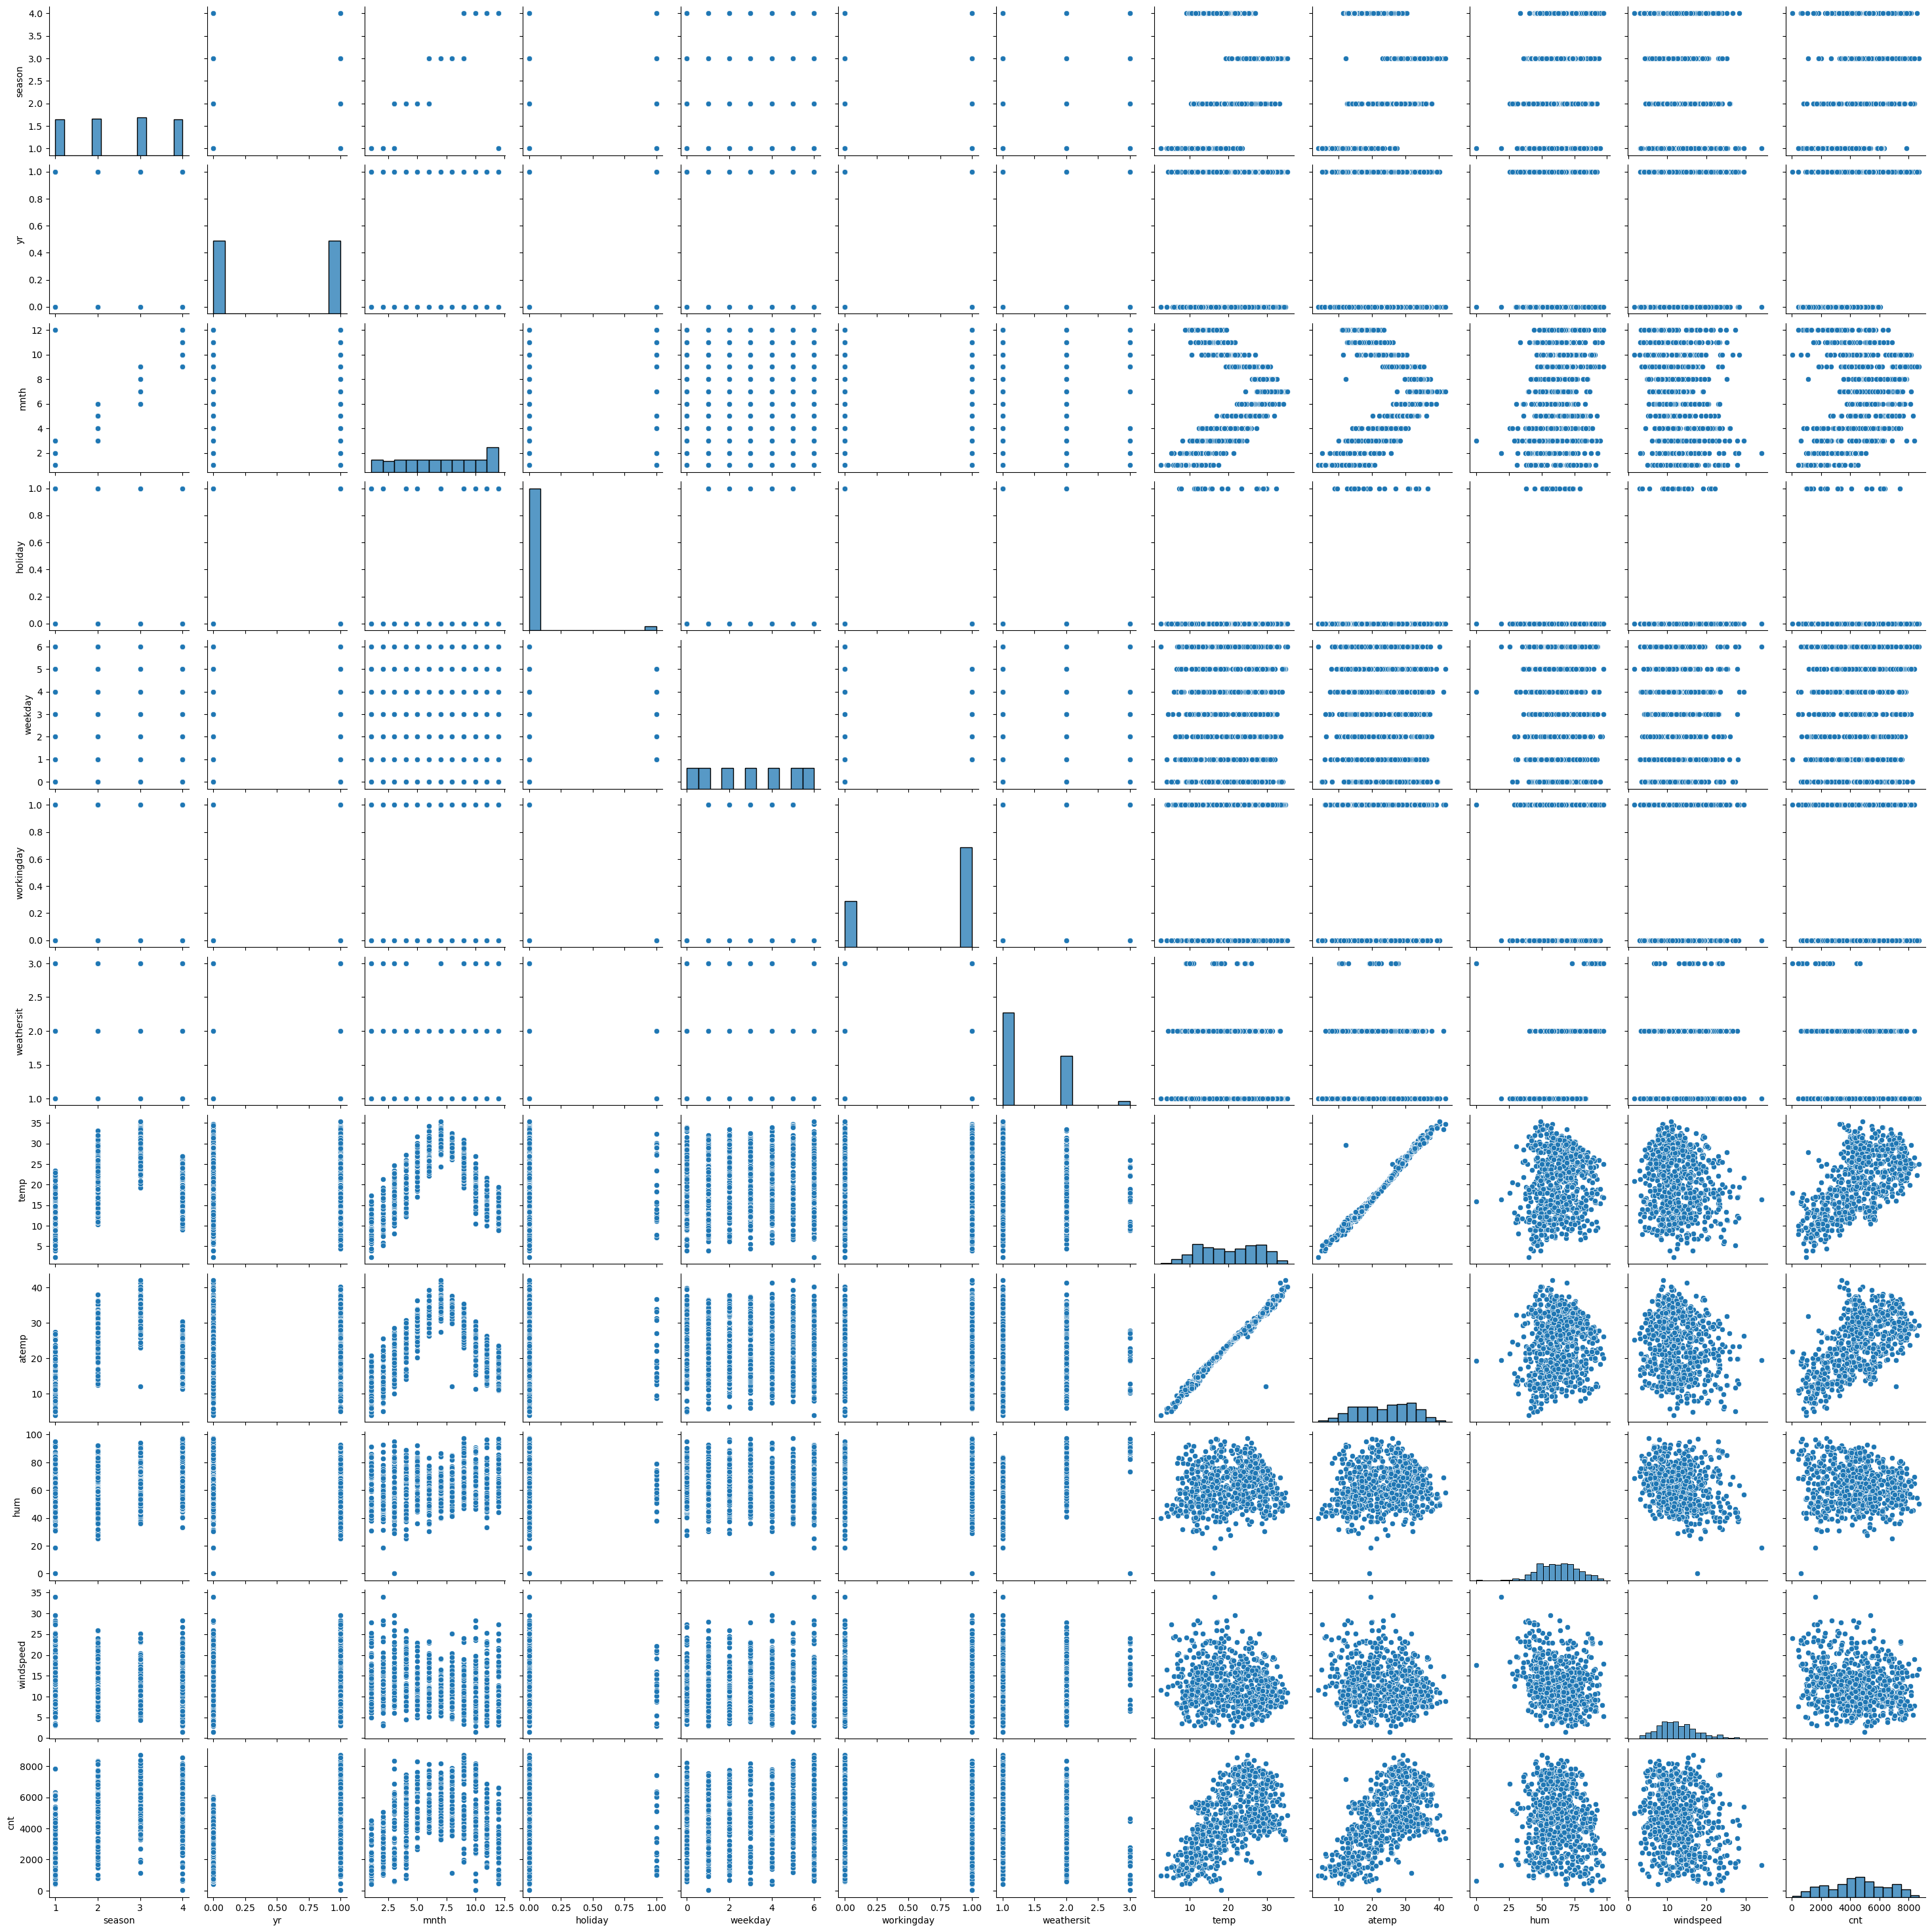

In [31]:
# Visualizing numerical variables

sns.pairplot(bike_df, palette='husl')
plt.show()

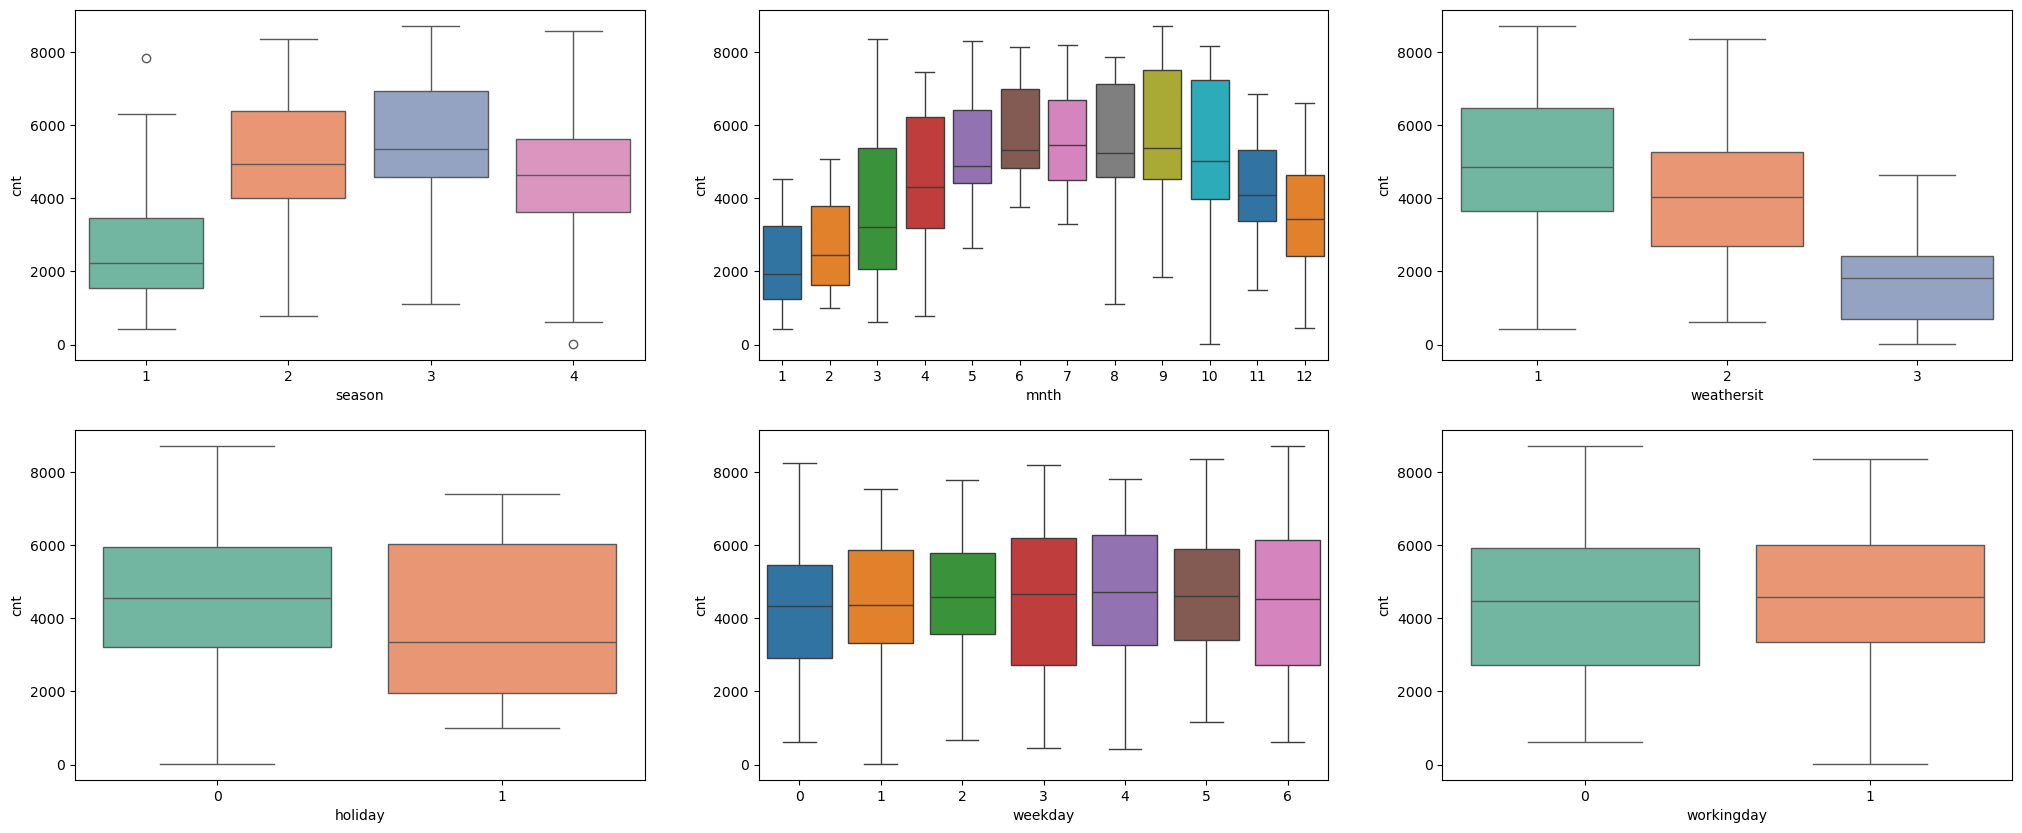

In [32]:
# Build boxplot of all categorical variables againt the target variable 'cnt' 
# to visualize predictor variables against the target variable

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df, palette='Set2')
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df, palette='tab10')
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df, palette='Set2')
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df, palette='Set2')
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df, palette='tab10')
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df, palette='Set2')
plt.show()

In [33]:
# Key inferences from the above box plots
# Season could be a key predictor for the dependent variable as season 3 (fall) saw a median of approx 5000+ bookings
# Holiday cannot be a good predictor as approx 98% bookings happnened on non-holidays
# Month can be good predictor as the data indicates bookings in months 5,6,7,8 & 9 have a median of greater than 4000 bookings
# Weathersit shows some trend towards bookings as Clear weather (indicated by 1) with a median approx 5000, account for 69% bookings 

## Step 2 : Data Preparation for Modeling

In [35]:
# Creating Dummy variables for the categorical variables - 'season', 'mnth', 'weekday' & 'weathersit'
# Before that change the data type of these categorical variables

bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')

bike_df = pd.get_dummies(bike_df, drop_first=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [36]:
bike_df['season_2'] = bike_df['season_2'].astype('int')
bike_df['season_3'] = bike_df['season_3'].astype('int')
bike_df['season_4'] = bike_df['season_4'].astype('int')
bike_df['mnth_2'] = bike_df['mnth_2'].astype('int')
bike_df['mnth_3'] = bike_df['mnth_3'].astype('int')
bike_df['mnth_4'] = bike_df['mnth_4'].astype('int')
bike_df['mnth_5'] = bike_df['mnth_5'].astype('int')
bike_df['mnth_6'] = bike_df['mnth_6'].astype('int')
bike_df['mnth_7'] = bike_df['mnth_7'].astype('int')
bike_df['mnth_8'] = bike_df['mnth_8'].astype('int')
bike_df['mnth_9'] = bike_df['mnth_9'].astype('int')
bike_df['mnth_10'] = bike_df['mnth_10'].astype('int')
bike_df['mnth_11'] = bike_df['mnth_11'].astype('int')
bike_df['mnth_12'] = bike_df['mnth_12'].astype('int')
bike_df['weekday_1'] = bike_df['weekday_1'].astype('int')
bike_df['weekday_2'] = bike_df['weekday_2'].astype('int')
bike_df['weekday_3'] = bike_df['weekday_3'].astype('int')
bike_df['weekday_4'] = bike_df['weekday_4'].astype('int')
bike_df['weekday_5'] = bike_df['weekday_5'].astype('int')
bike_df['weekday_6'] = bike_df['weekday_6'].astype('int')
bike_df['weathersit_2'] = bike_df['weathersit_2'].astype('int')
bike_df['weathersit_3'] = bike_df['weathersit_3'].astype('int')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    int64  
 9   season_3      730 non-null    int64  
 10  season_4      730 non-null    int64  
 11  mnth_2        730 non-null    int64  
 12  mnth_3        730 non-null    int64  
 13  mnth_4        730 non-null    int64  
 14  mnth_5        730 non-null    int64  
 15  mnth_6        730 non-null    int64  
 16  mnth_7        730 non-null    int64  
 17  mnth_8        730 non-null    int64  
 18  mnth_9        730 non-null    

### Splitting the data into Training & Test sets

In [38]:
np.random.seed(0)
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_df, train_size = 0.70, test_size = 0.30, random_state = 333)

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    int64  
 9   season_3      510 non-null    int64  
 10  season_4      510 non-null    int64  
 11  mnth_2        510 non-null    int64  
 12  mnth_3        510 non-null    int64  
 13  mnth_4        510 non-null    int64  
 14  mnth_5        510 non-null    int64  
 15  mnth_6        510 non-null    int64  
 16  mnth_7        510 non-null    int64  
 17  mnth_8        510 non-null    int64  
 18  mnth_9        510 non-null    int

In [40]:
df_train.shape

(510, 30)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    int64  
 9   season_3      219 non-null    int64  
 10  season_4      219 non-null    int64  
 11  mnth_2        219 non-null    int64  
 12  mnth_3        219 non-null    int64  
 13  mnth_4        219 non-null    int64  
 14  mnth_5        219 non-null    int64  
 15  mnth_6        219 non-null    int64  
 16  mnth_7        219 non-null    int64  
 17  mnth_8        219 non-null    int64  
 18  mnth_9        219 non-null    int6

In [42]:
df_test.shape

(219, 30)

### Rescaling the features

It is required to make the numerical variables are of comparable scale

In [44]:
# Applying scaler to numeric variables

scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
# checking the values after scaling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3 : Building & Training the model

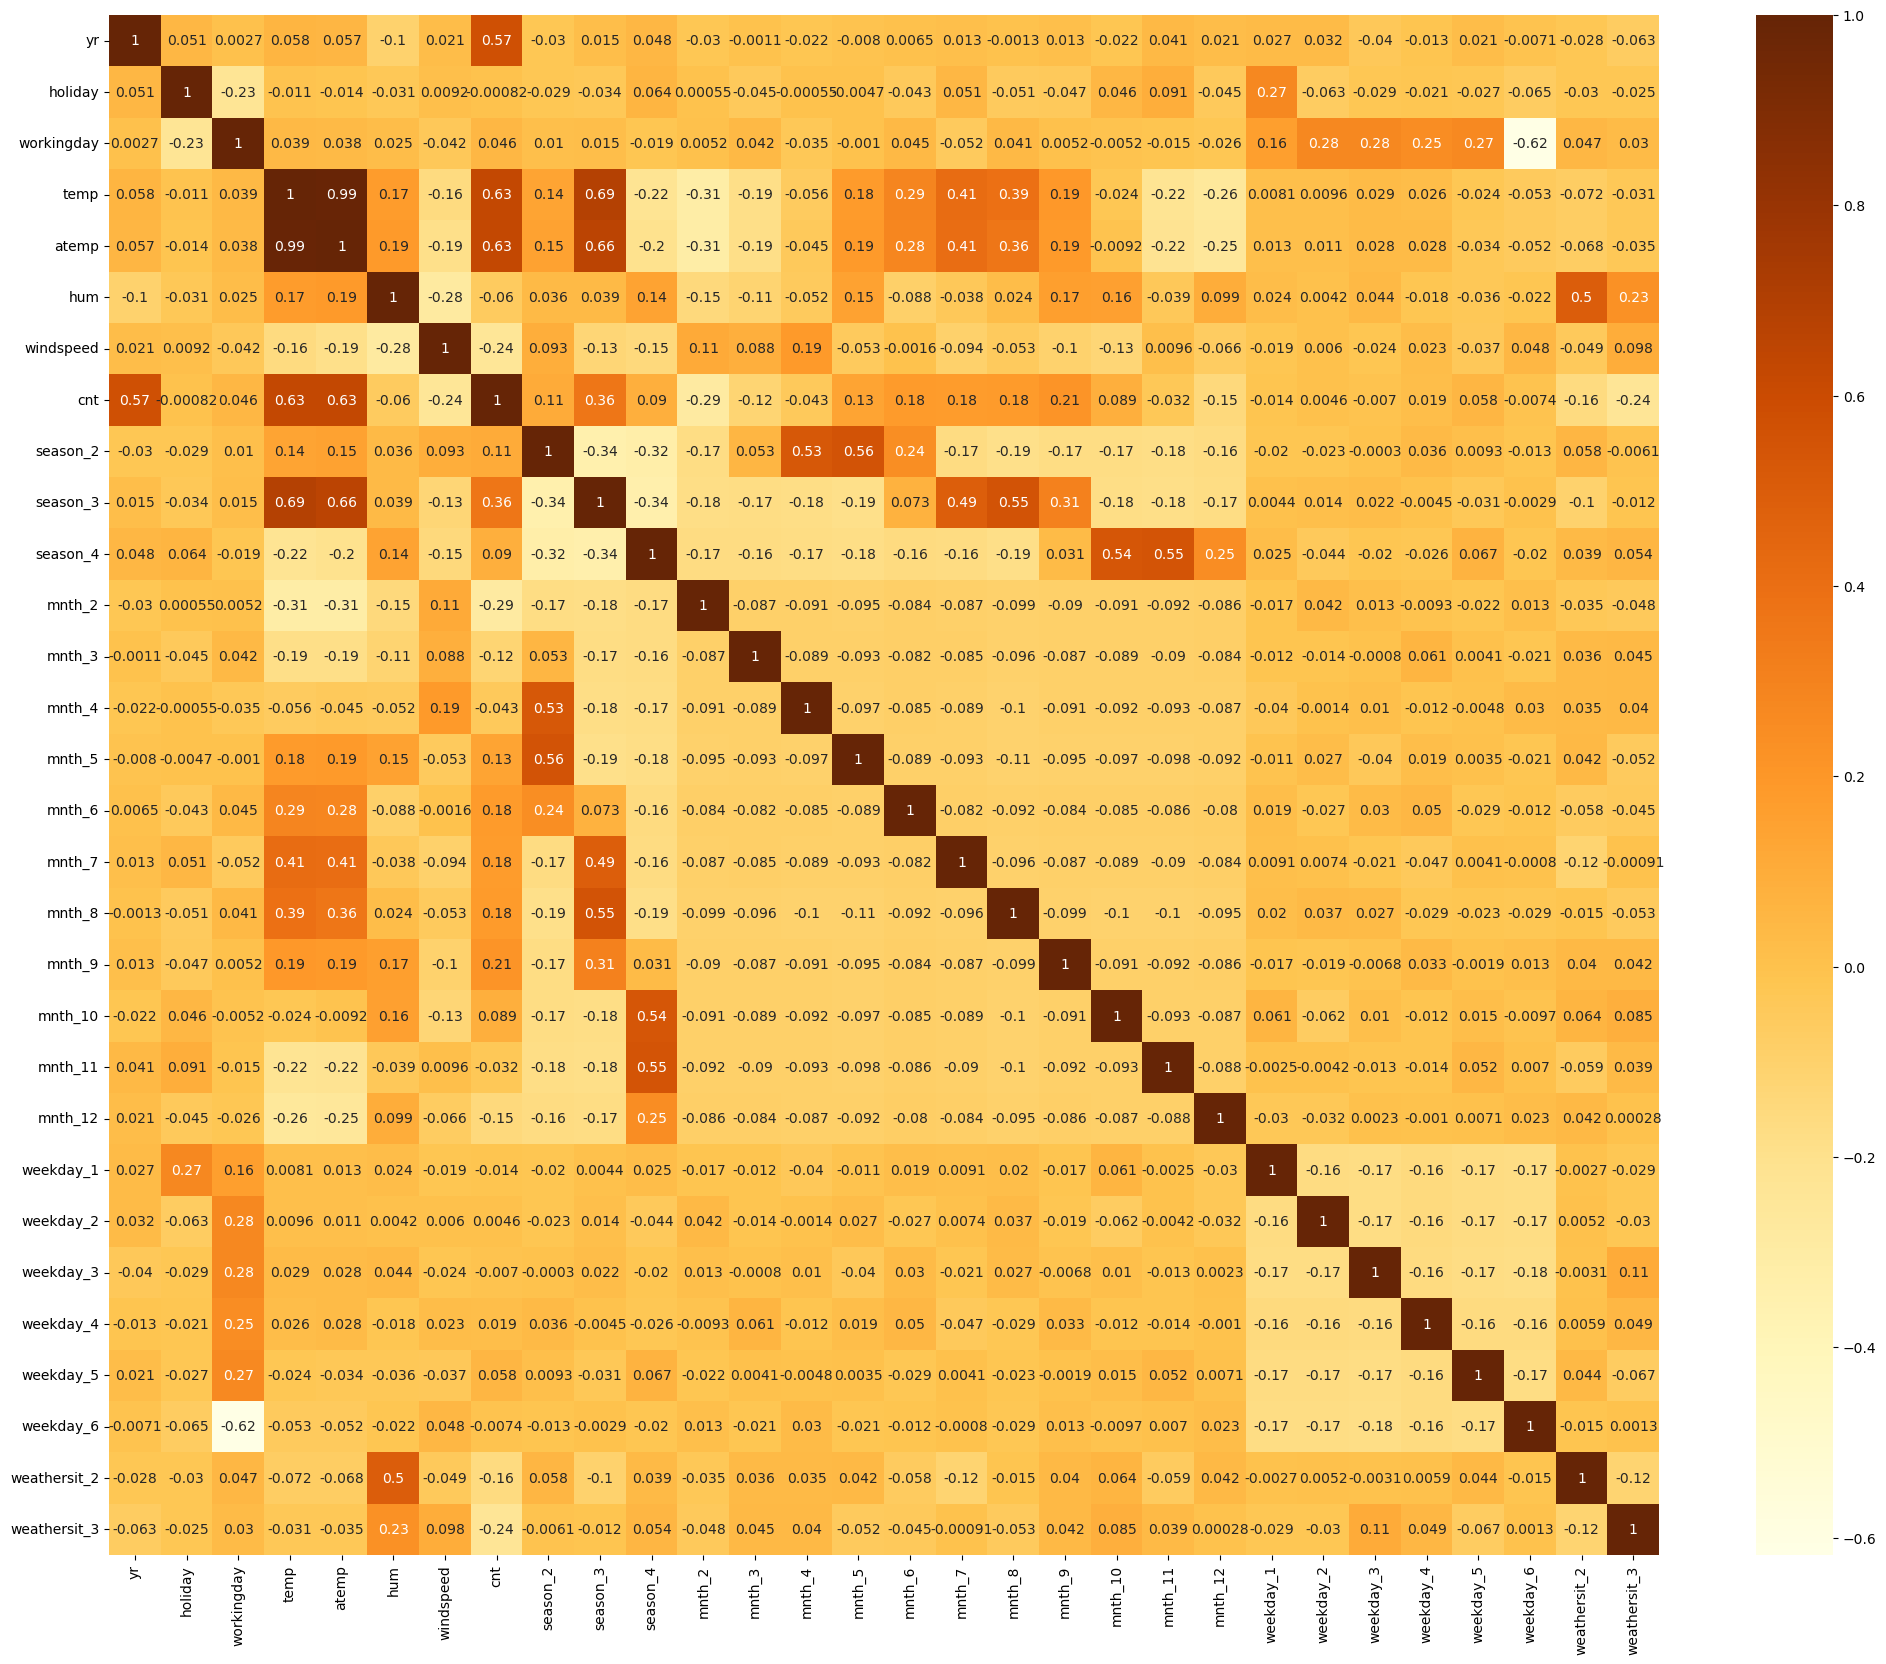

In [48]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlOrBr")
plt.show()

In [49]:
# Key inference from the above heatmap
# The heatmap shows which all variables are multicollinear in nature
# it also reflects which variables have high correlation with target variable cnt - like tenp, yr

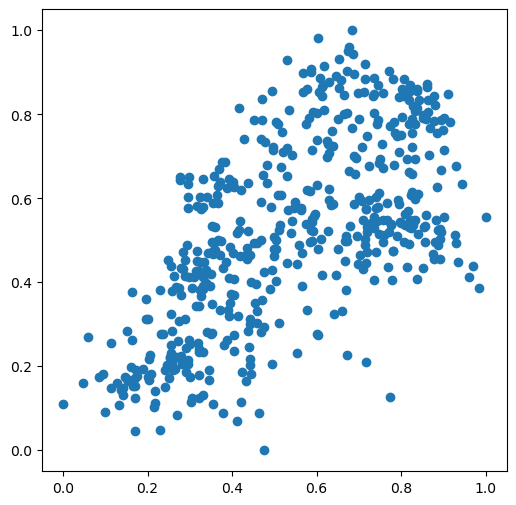

In [50]:
# Lets use a pairplot for temp vs cnt

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [51]:
# Using temp as first variable and fit a regression line to it

### Dividing into X and Y sets for model building

In [53]:
y_train = df_train.pop('cnt')
X_train = df_train

In [54]:
y_train.head()

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
Name: cnt, dtype: float64

In [55]:
# Add a constant
X_train_sm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

In [56]:
# Check the parameters obtained

lr_model.params

const    0.181283
temp     0.617230
dtype: float64

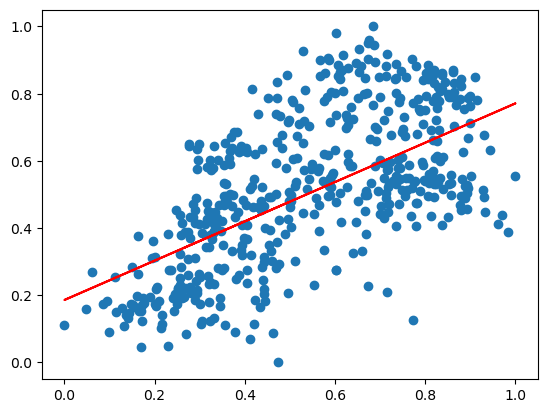

In [57]:
# Visulazing the data with a scatter plot and the fitted regression line

plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.186 + 0.585*X_train_sm.iloc[:, 1], 'r')
plt.show()

In [58]:
# Print a summary of the linear regression model obtained
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     329.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           4.11e-57
Time:                        20:14:09   Log-Likelihood:                 166.67
No. Observations:                 510   AIC:                            -329.3
Df Residuals:                     508   BIC:                            -320.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1813      0.020      9.083      0.0

#### Since there are many variable to be checked & added for improving R-Squared, let us use the automated approach (RFE)

In [60]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 6),
 ('mnth_4', False, 13),
 ('mnth_5', False, 10),
 ('mnth_6', False, 15),
 ('mnth_7', False, 9),
 ('mnth_8', False, 14),
 ('mnth_9', True, 1),
 ('mnth_10', False, 11),
 ('mnth_11', False, 7),
 ('mnth_12', False, 8),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 5),
 ('weathersit_3', True, 1)]

In [62]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [63]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [64]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


#### Building a model using statsmodel

#### Model 1

#### VIF Check

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.95
3,temp,7.13
5,windspeed,4.18


In [69]:
# Adding a constant

X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [70]:
# Checking the parameters obtained

lr1.params

const           0.266757
yr              0.225744
holiday        -0.029078
workingday      0.012076
temp            0.603182
hum            -0.279365
windspeed      -0.209574
season_2        0.083297
season_4        0.138869
mnth_9          0.102467
weekday_1      -0.021819
weekday_2      -0.008206
weekday_3       0.005685
weekday_4       0.002158
weekday_5       0.005180
weathersit_3   -0.216195
dtype: float64

In [71]:
# Print a summary of the linear regression model obtained

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.87e-177
Time:                        20:14:09   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597   

#### Model 2

In [73]:
# Removing the variable 'hum' based on its High VIF

X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
8,weekday_1,inf
9,weekday_2,inf
10,weekday_3,inf
11,weekday_4,inf
12,weekday_5,inf
3,temp,4.43
4,windspeed,3.60
0,yr,2.00


In [75]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [76]:
lr2.params

const           0.082809
yr              0.233888
holiday        -0.022921
workingday      0.011098
temp            0.576756
windspeed      -0.143603
season_2        0.072325
season_4        0.122556
mnth_9          0.084632
weekday_1      -0.024466
weekday_2      -0.009823
weekday_3       0.005887
weekday_4       0.006709
weekday_5       0.009870
weathersit_3   -0.279661
dtype: float64

In [77]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.95e-163
Time:                        20:14:09   Log-Likelihood:                 447.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     496   BIC:                            -807.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0828      0.020      4.194   

#### Model 3

In [79]:
# Removing the variable 'weekday_3' based on its High p-value

X_train_rfe = X_train_rfe.drop(["weekday_3"], axis = 1)

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,6.49
3,temp,4.43
4,windspeed,3.60
8,weekday_1,2.02
0,yr,2.00
11,weekday_5,2.00
9,weekday_2,1.96
10,weekday_4,1.86
5,season_2,1.54
6,season_4,1.37


In [81]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [82]:
lr3.params

const           0.082809
yr              0.233888
holiday        -0.017035
workingday      0.016985
temp            0.576756
windspeed      -0.143603
season_2        0.072325
season_4        0.122556
mnth_9          0.084632
weekday_1      -0.030352
weekday_2      -0.015710
weekday_4       0.000822
weekday_5       0.003983
weathersit_3   -0.279661
dtype: float64

In [83]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.95e-163
Time:                        20:14:09   Log-Likelihood:                 447.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     496   BIC:                            -807.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0828      0.020      4.194   

#### Model 4

In [85]:
# Removing the variable 'weekday_4' based on its High p-value

X_train_rfe = X_train_rfe.drop(["weekday_4"], axis = 1)

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.42
2,workingday,4.41
4,windspeed,3.60
0,yr,2.00
8,weekday_1,1.59
10,weekday_5,1.55
5,season_2,1.54
9,weekday_2,1.52
6,season_4,1.37
1,holiday,1.24


In [87]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [88]:
lr4.params

const           0.082785
yr              0.233893
holiday        -0.016647
workingday      0.017366
temp            0.576749
windspeed      -0.143556
season_2        0.072342
season_4        0.122561
mnth_9          0.084663
weekday_1      -0.030734
weekday_2      -0.016091
weekday_5       0.003601
weathersit_3   -0.279713
dtype: float64

In [89]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.55e-164
Time:                        20:14:09   Log-Likelihood:                 447.46
No. Observations:                 510   AIC:                            -868.9
Df Residuals:                     497   BIC:                            -813.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0828      0.020      4.198   

#### Model 5

In [91]:
# Removing the variable 'weekday_5' based on its High p-value

X_train_rfe = X_train_rfe.drop(["weekday_5"], axis = 1)

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.42
4,windspeed,3.59
2,workingday,3.54
0,yr,2.00
5,season_2,1.54
8,weekday_1,1.41
6,season_4,1.36
9,weekday_2,1.34
1,holiday,1.22
7,mnth_9,1.19


In [93]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [94]:
lr5.params

const           0.082832
yr              0.233959
holiday        -0.015471
workingday      0.018607
temp            0.576584
windspeed      -0.143649
season_2        0.072399
season_4        0.122745
mnth_9          0.084661
weekday_1      -0.031977
weekday_2      -0.017328
weathersit_3   -0.280504
dtype: float64

In [95]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          3.42e-165
Time:                        20:14:09   Log-Likelihood:                 447.43
No. Observations:                 510   AIC:                            -870.9
Df Residuals:                     498   BIC:                            -820.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0828      0.020      4.204   

#### Model 6

In [97]:
# Removing the variable 'holiday' based on its High p-value

X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.38
3,windspeed,3.57
1,workingday,3.25
0,yr,1.99
4,season_2,1.54
5,season_4,1.35
8,weekday_2,1.34
7,weekday_1,1.26
6,mnth_9,1.19
9,weathersit_3,1.05


In [99]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [100]:
lr6.params

const           0.082083
yr              0.233786
workingday      0.020128
temp            0.576388
windspeed      -0.143788
season_2        0.072451
season_4        0.122441
mnth_9          0.085037
weekday_1      -0.034229
weekday_2      -0.017831
weathersit_3   -0.280454
dtype: float64

In [101]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.66e-166
Time:                        20:14:09   Log-Likelihood:                 447.32
No. Observations:                 510   AIC:                            -872.6
Df Residuals:                     499   BIC:                            -826.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0821      0.020      4.183   

#### Model 7

In [103]:
# Removing the variable 'weekday_2 ' based on its High p-value

X_train_rfe = X_train_rfe.drop(["weekday_2"], axis = 1)

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.38
3,windspeed,3.57
1,workingday,2.89
0,yr,1.99
4,season_2,1.54
5,season_4,1.35
7,weekday_1,1.20
6,mnth_9,1.19
8,weathersit_3,1.05


In [105]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [106]:
lr7.params

const           0.081847
yr              0.233347
workingday      0.015942
temp            0.576381
windspeed      -0.144309
season_2        0.073188
season_4        0.123108
mnth_9          0.085697
weekday_1      -0.030335
weathersit_3   -0.278826
dtype: float64

In [107]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     218.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          3.97e-167
Time:                        20:14:09   Log-Likelihood:                 446.47
No. Observations:                 510   AIC:                            -872.9
Df Residuals:                     500   BIC:                            -830.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0818      0.020      4.168   

#### Model 8

In [109]:
# Removing the variable 'workingday' based on its High p-value

X_train_rfe = X_train_rfe.drop(["workingday"], axis = 1)

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.85
2,windspeed,3.35
0,yr,1.98
3,season_2,1.53
4,season_4,1.33
5,mnth_9,1.19
6,weekday_1,1.16
7,weathersit_3,1.05


In [111]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [112]:
lr8.params

const           0.092482
yr              0.233370
temp            0.577239
windspeed      -0.146326
season_2        0.073291
season_4        0.122691
mnth_9          0.085656
weekday_1      -0.026782
weathersit_3   -0.276867
dtype: float64

In [113]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     245.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          9.04e-168
Time:                        20:14:09   Log-Likelihood:                 445.14
No. Observations:                 510   AIC:                            -872.3
Df Residuals:                     501   BIC:                            -834.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0925      0.019      4.990   

There is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5 (VIF)
Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only

### Equation for the best fitted line is based on final model (Model 8)

cnt = 0.092482 + (**yr** × 0.233370) + (**temp** × 0.577239) − (**windspeed** × 0.146326) + (**season2** × 0.073291) + (**season4** × 0.122691) + (**mnth9** × 0.085656) - (**weekday1** × 0.026782) − (**weathersit3** × 0.276867)

## Step 4 : Residual Analysis of the train data

In [118]:
# Checking if the error terms are also nornally distributed

y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

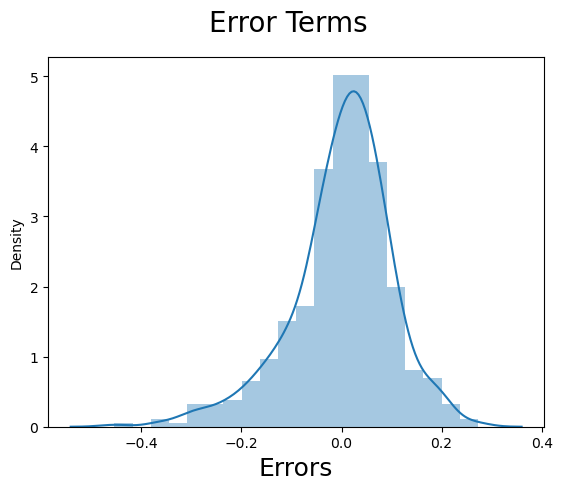

In [119]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

In [120]:
# From the above histogram, we could see that the Residuals are normally distributed and it validates our assumptions for linear regression

### There is linear relationships exists between X & Y

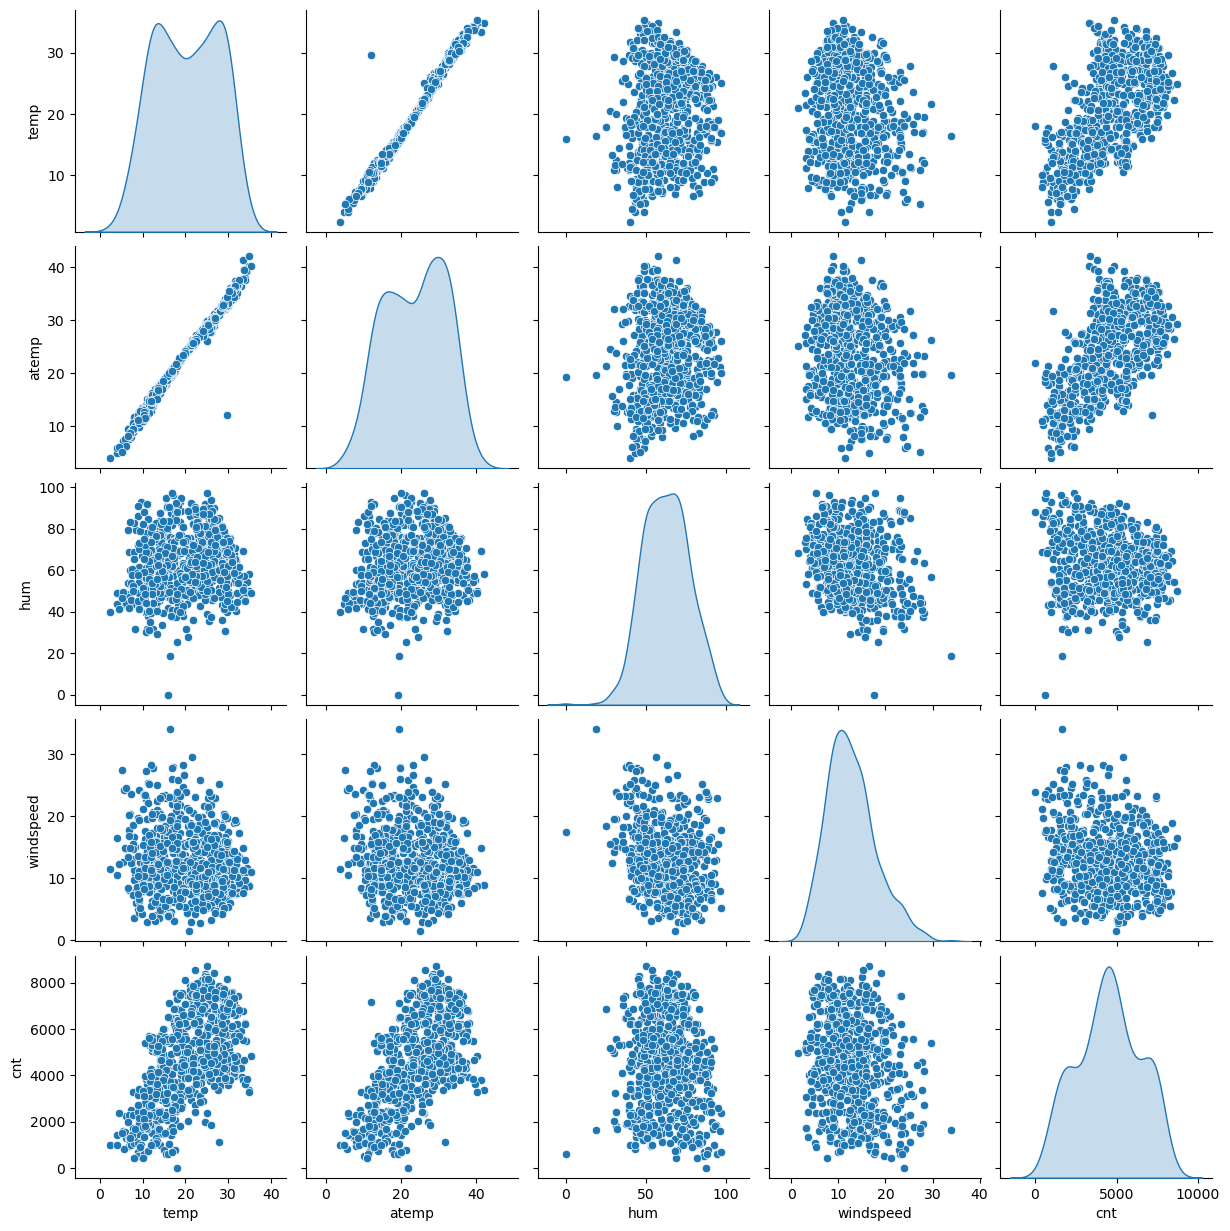

In [122]:
bike_new=bike_df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_new, diag_kind='kde')
plt.show()

From the pair plot, we could see there is a linear relation between temp and atemp variable with ‘cnt’

## Step 5 : Making predictions using the final model

#### Applying the scaling test data sets

In [125]:
# Apply scaler() to all numeric variables in test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [126]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [127]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [129]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    int64  
 8   season_3      219 non-null    int64  
 9   season_4      219 non-null    int64  
 10  mnth_2        219 non-null    int64  
 11  mnth_3        219 non-null    int64  
 12  mnth_4        219 non-null    int64  
 13  mnth_5        219 non-null    int64  
 14  mnth_6        219 non-null    int64  
 15  mnth_7        219 non-null    int64  
 16  mnth_8        219 non-null    int64  
 17  mnth_9        219 non-null    int64  
 18  mnth_10       219 non-null    int6

In [130]:
#Selecting the variables from final model
col1=X_train_rfe.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    int64  
 5   season_4      219 non-null    int64  
 6   mnth_9        219 non-null    int64  
 7   weekday_1     219 non-null    int64  
 8   weathersit_3  219 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 17.1 KB


In [131]:
# Making predictions using the final model (lr6)

y_pred = lr8.predict(X_test_lm8)

### Model Evaluation

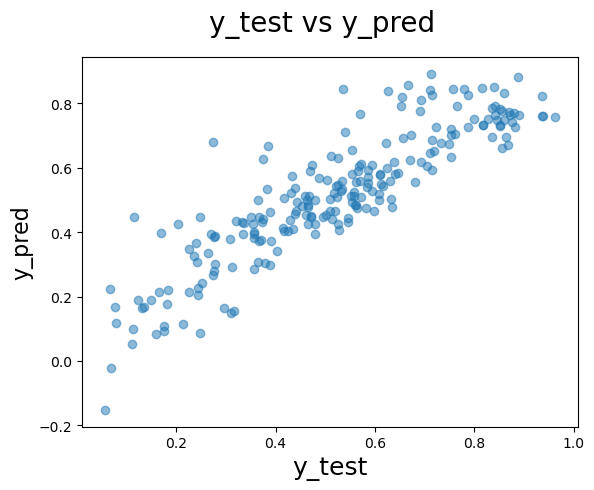

In [133]:
# Plot y_test and y_pred to visualize & understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R^2 Value for TEST

In [135]:
r2_score(y_test, y_pred)

0.7804301742743992

### Adjusted R^2 Value for TEST

In [137]:
# R^2 value has already been calculated in the previous step

r2 = 0.7804301742743992

In [138]:
X_test.shape

(219, 8)

In [139]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7720656094848525

## Final Result

- Train R^2 :0.796
- Train Adjusted R^2 :0.793
- Test R^2 :0.780
- Test Adjusted R^2 :0.772

## Final Report

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.5772’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5772 units. 
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.2769’ indicated that (with respect to weathersit_1, a unit increase in weathersit_3 variable decreases the bike hire numbers by -0.2769 units.
- **Year (yr)** - A coefficient value of ‘0.2334’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2334 units. 

#### So, it's suggested to consider these variables while planning, to achive maximum Booking

The next set of features that can be considered are 
- **season_4:** - A coefficient value of ‘0.1227’ indicated that (with respect to) season_1), a unit increase in season_4 variable increases the bike hire numbers by 00.1227 units. 
- **windspeed:** - A coefficient value of ‘-0.1463’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by -0.1463 units. 

 #### NOTE: 
 - **weathersit_1 refers to:** Clear, Few clouds, Partly cloudy, Partly cloudy
 - **weathersit_3 refers to:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
 - **season1 refers to:** spring 
 - **season4 refers to:** winter